# **Market Stock Prediction Using Batch Learning and Stream Learning**

In [1]:
import numpy as np
import pandas as pd
import binance as bn
import os

In [3]:
from binance.client import Client

api_key = os.environ.get('binance_api_key')
api_secret = os.environ.get('binance_api_secret')

In [5]:
client = Client(api_key, api_secret)

In [6]:
print(client.get_account())

{'makerCommission': 10, 'takerCommission': 10, 'buyerCommission': 0, 'sellerCommission': 0, 'commissionRates': {'maker': '0.00100000', 'taker': '0.00100000', 'buyer': '0.00000000', 'seller': '0.00000000'}, 'canTrade': True, 'canWithdraw': True, 'canDeposit': True, 'brokered': False, 'requireSelfTradePrevention': False, 'preventSor': False, 'updateTime': 1733366667958, 'accountType': 'SPOT', 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'BNB', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'GAS',

In [7]:
print(client.get_account().keys())

dict_keys(['makerCommission', 'takerCommission', 'buyerCommission', 'sellerCommission', 'commissionRates', 'canTrade', 'canWithdraw', 'canDeposit', 'brokered', 'requireSelfTradePrevention', 'preventSor', 'updateTime', 'accountType', 'balances', 'permissions', 'uid'])


In [8]:
print(client.get_account()['balances'])

[{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'BNB', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'USDT', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'HSR', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'OAX', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'DNT', 'free': '0.00000000', 'locked': '0.00000000'}, {'asset': 'MCO', 'free': '0.00000000'

In [9]:
import matplotlib.pyplot as plt
import plotly as ptly
import plotly.graph_objs as go 

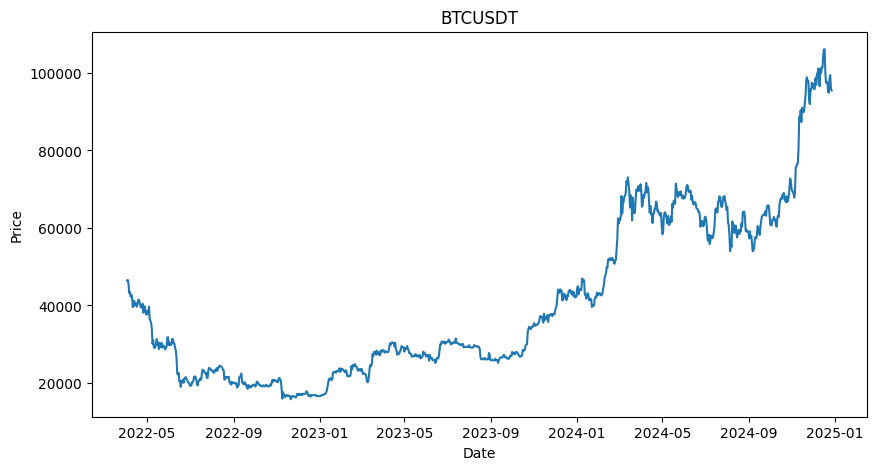

In [10]:
# Get the last 1000 candlesticks of BTCUSDT
candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1DAY, limit=1000)

#candles = [candle1, ..., candle1000]
# candle.keys() = ['openTime', 'open', 'high', 'low', 'close', 'volume', 'closeTime', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseAssetVolume', 'takerBuyQuoteAssetVolume', 'ignore']
# Extract the close prices
close_prices = [float(candle[4]) for candle in candles] # 4th index is the close price, 0th index is the timestamp, 1st index is the open price, 2nd index is the high price, 3rd index is the low price

# Extract the timestamps
timestamps = [candle[0] for candle in candles]

# Convert the timestamps to dates
dates = pd.to_datetime(timestamps, unit='ms')

# Create a DataFrame
df = pd.DataFrame(data={'date': dates, 'close': close_prices})

# Plot the close prices
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['close'])
plt.title('BTCUSDT')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [11]:
#plot the candles using plotly
candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1DAY, limit=1000)
spot_infos = [candle[:6] for candle in candles]
df = pd.DataFrame(spot_infos, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
df['date'] = pd.to_datetime(df['date'], unit='ms')
candle = go.Candlestick(x=df['date'],
                        open=df['open'],
                        high=df['high'],
                        low=df['low'],
                        close=df['close'])
layout = go.Layout(title='BTCUSDT', xaxis={'title': 'Date'}, yaxis={'title': 'Price'})
fig = go.Figure(data=[candle], layout=layout)
ptly.offline.plot(fig, filename='btcusdt.html')

'btcusdt.html'

In [12]:
df.head()

,date,open,high,low,close,volume
0,2022-04-03,45810.99000000,47444.11000000,45530.92000000,46407.35000000,33394.67794000
1,2022-04-04,46407.36000000,46890.71000000,45118.00000000,46580.51000000,44641.87514000
2,2022-04-05,46580.50000000,47200.00000000,45353.81000000,45497.55000000,42192.74852000
3,2022-04-06,45497.54000000,45507.14000000,43121.00000000,43170.47000000,60849.32936000
4,2022-04-07,43170.47000000,43900.99000000,42727.35000000,43444.19000000,37396.54156000


In [14]:
df.to_csv('BL_data_BTCUSDT.csv')

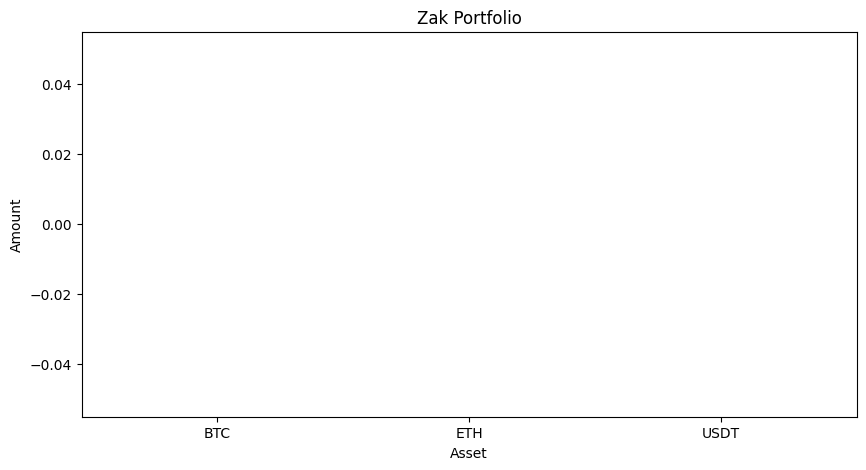

In [13]:
# plot my portfolio only for BTC, ETH, and USDT
balances = client.get_account()['balances']
balances = [balance for balance in balances if balance['asset'] in ['BTC', 'ETH', 'USDT']]
symbols = [balance['asset'] for balance in balances]
values = [float(balance['free']) for balance in balances]
plt.figure(figsize=(10, 5))
plt.bar(symbols, values)
plt.title('Zak Portfolio')
plt.xlabel('Asset')
plt.ylabel('Amount')
plt.show()
